In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import datetime

In [2]:
# Read country file and store into Pandas data frame
land_temp_by_country_csv = "../../ProjectOne_datasets/GlobalLandTemperaturesByCountry.csv"
land_temp_by_country_df = pd.read_csv(land_temp_by_country_csv)
land_temp_by_country_df.tail()


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe
577461,2013-09-01,NaN,NaN,Zimbabwe


In [3]:
# Read cities file and store into Pandas data frame
land_temp_by_city_csv = "../../ProjectOne_datasets/GlobalLandTemperaturesByCity.csv"
land_temp_by_city_df = pd.read_csv(land_temp_by_city_csv)
land_temp_by_city_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [4]:
# Read major cities file and store into Pandas data frame
land_temp_by_major_city_csv = "../../ProjectOne_datasets/GlobalLandTemperaturesByMajorCity.csv"
land_temp_by_major_city_df = pd.read_csv(land_temp_by_major_city_csv)
land_temp_by_major_city_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [5]:
# Read state file and store into Pandas data frame
land_temp_by_state_csv = "../../ProjectOne_datasets/GlobalLandTemperaturesByState.csv"
land_temp_by_state_df = pd.read_csv(land_temp_by_state_csv)
land_temp_by_state_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [6]:
print(f"Country Size: {len(land_temp_by_country_df)}")
print(f"Cities Size: {len(land_temp_by_city_df)}")
print(f"Major Cities Size: {len(land_temp_by_major_city_df)}")
print(f"State Size: {len(land_temp_by_state_df)}")


Country Size: 577462
Cities Size: 8599212
Major Cities Size: 239177
State Size: 645675


In [7]:
# Cleanup Datasets
#Drop AverageTemperatureUncertainty
land_temp_by_country_df = land_temp_by_country_df.drop(["AverageTemperatureUncertainty"], axis=1)
land_temp_by_city_df = land_temp_by_city_df.drop(["AverageTemperatureUncertainty"], axis=1)
land_temp_by_major_city_df = land_temp_by_major_city_df.drop(["AverageTemperatureUncertainty"], axis=1)
land_temp_by_state_df = land_temp_by_state_df.drop(["AverageTemperatureUncertainty"], axis=1)

In [8]:
#Remove rows with null temperatures
land_temp_by_country_df = land_temp_by_country_df[land_temp_by_country_df["AverageTemperature"].notna()]
land_temp_by_city_df = land_temp_by_city_df[land_temp_by_city_df["AverageTemperature"].notna()]
land_temp_by_major_city_df = land_temp_by_major_city_df[land_temp_by_major_city_df["AverageTemperature"].notna()]
land_temp_by_state_df = land_temp_by_state_df[land_temp_by_state_df["AverageTemperature"].notna()]

print(f"Country Size: {len(land_temp_by_country_df)}")
print(f"Cities Size: {len(land_temp_by_city_df)}")
print(f"Major Cities Size: {len(land_temp_by_major_city_df)}")
print(f"State Size: {len(land_temp_by_state_df)}")

Country Size: 544811
Cities Size: 8235082
Major Cities Size: 228175
State Size: 620027


In [9]:
#Retrieve rows for the last century
cent_land_temp_by_country_df = land_temp_by_country_df.loc[land_temp_by_country_df["dt"] >= "1900-01-01"]
cent_land_temp_by_city_df = land_temp_by_city_df.loc[land_temp_by_city_df["dt"] >= "1900-01-01"]
cent_land_temp_by_majorgod_city_df = land_temp_by_major_city_df.loc[land_temp_by_major_city_df["dt"] >= "1900-01-01"]
cent_land_temp_by_state_df = land_temp_by_state_df.loc[land_temp_by_state_df["dt"] >= "1900-01-01"]

print(f"Country Size: {len(cent_land_temp_by_country_df)}")
print(f"Cities Size: {len(cent_land_temp_by_city_df)}")
print(f"Major Cities Size: {len(cent_land_temp_by_major_city_df)}")
print(f"State Size: {len(cent_land_temp_by_state_df)}")

Country Size: 328818
Cities Size: 4788080
Major Cities Size: 136407
State Size: 328784


In [10]:
cent_land_temp_by_country_df.dtypes

dt                     object
AverageTemperature    float64
Country                object
dtype: object

In [15]:
#USA Data 
usa_land_temp_by_country_df = cent_land_temp_by_country_df.loc[land_temp_by_country_df["Country"] == "United States"]
usa_land_temp_by_country_df = usa_land_temp_by_country_df.groupby((pd.DatetimeIndex(usa_land_temp_by_country_df["dt"]).year//10)*10).mean()
usa_land_temp_by_country_df["Country"] = "United States"

usa_land_temp_by_country_df.reset_index(inplace=True)
usa_land_temp_by_country_df = usa_land_temp_by_country_df.rename(columns = {'dt':'Decade'})


usa_land_temp_by_country_df.tail()

,Decade,AverageTemperature,Country
7,1970,8.696925,United States
8,1980,9.104308,United States
9,1990,9.317558,United States
10,2000,9.646725,United States
11,2010,10.077178,United States


In [ ]:
#What I ulitmately want to do is the same exact data frame - however - NOT filter just to the USA.
#HOW?!

The correlation coefficient: 0.83.


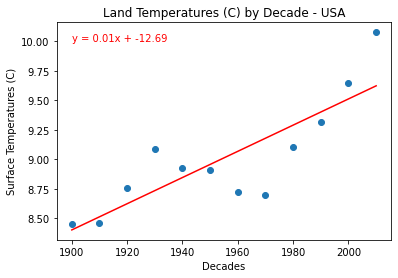

In [21]:
x_axis = usa_land_temp_by_country_df["Decade"]
y_axis = usa_land_temp_by_country_df["AverageTemperature"]

correlation_coeff = st.pearsonr(x_axis, y_axis)
print(f"The correlation coefficient: {round(correlation_coeff[0],2)}.")

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regression_value = slope * x_axis + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regression_value, "r-")
plt.annotate(line_equation, (1900, 10), color="red")

plt.title("Land Temperatures (C) by Decade - USA")
plt.xlabel("Decades")
plt.ylabel("Surface Temperatures (C)")
plt.show()